# Simple GRU implementation with Keras

In this code we:

- generate synthetic time series data, which is a sine wave with some added noise.
- split the data into input sequences and target values for training.
- create a simple GRU-based RNN model using TensorFlow.
- compile the model using mean squared error (MSE) as the loss function.
- train the model on the training data.
- evaluate the model on the test data and print the test loss.

Finally, we make predictions and plot the actual vs. predicted values.
Make sure to install TensorFlow and matplotlib if you haven't already using pip install tensorflow matplotlib.

In [1]:
import numpy             as np
import tensorflow        as tf
import matplotlib.pyplot as plt
import matplotlib

print("NumPy Version:",       np.__version__)
print("TensorFlow Version:",  tf.__version__)
print("Matplotlib Version:",  matplotlib.__version__)

NumPy Version: 1.24.3
TensorFlow Version: 2.13.0
Matplotlib Version: 3.7.1


In [2]:
# Generate synthetic time series data
np.random.seed(0)
t = np.arange(0, 100, 0.1)
sin_wave = np.sin(t) + 0.1 * np.random.randn(len(t))

In [3]:
# Split the time series data into input sequences and target values
sequence_length = 10
X = []
y = []
for i in range(len(t) - sequence_length):
    X.append(sin_wave[i:i+sequence_length])
    y.append(sin_wave[i+sequence_length])

X = np.array(X)
y = np.array(y)

In [4]:
# Split the data into training and testing sets
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In this example:

- We create a sequential Keras model.
- We add a GRU layer with 32 units. You can adjust the number of units based on your problem complexity.

`input_shape` specifies the shape of each input sequence. `sequence_length` is the length of your input sequences, and `num_features` is the number of features at each time step (in this case 1).

We add a Dense layer with 1 neuron for regression. You can customize the output layer depending on your task.

In [5]:
# Create a GRU-based RNN model
model = tf.keras.Sequential([
    tf.keras.layers.GRU(32, input_shape=(sequence_length, 1)),
    tf.keras.layers.Dense(1)
])

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [7]:
# Reshape the input data to match the expected input shape for the GRU layer
X_train = X_train.reshape(-1, sequence_length, 1)
X_test = X_test.reshape(-1, sequence_length, 1)

In [8]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
23/23 [==============================] - 3s 36ms/step - loss: 0.2355 - val_loss: 0.1035
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0617 - val_loss: 0.0555
Epoch 3/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0492 - val_loss: 0.0482
Epoch 4/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0422 - val_loss: 0.0414
Epoch 5/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0371 - val_loss: 0.0354
Epoch 6/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0324 - val_loss: 0.0320
Epoch 7/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0290 - val_loss: 0.0262
Epoch 8/50
23/23 [==============================] - 0s 8ms/step - loss: 0.0238 - val_loss: 0.0219
Epoch 9/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0204 - val_loss: 0.0178
Epoch 10/50
23/23 [==============================] - 0s 7ms/step - loss: 0.0174 - val_loss: 0.0163
Epoch 11/50
23/23 

In [9]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

7/7 [==============================] - 0s 3ms/step - loss: 0.0123
Test Loss: 0.01232091337442398


In [10]:
# Make predictions
predictions = model.predict(X_test)

7/7 [==============================] - 1s 3ms/step


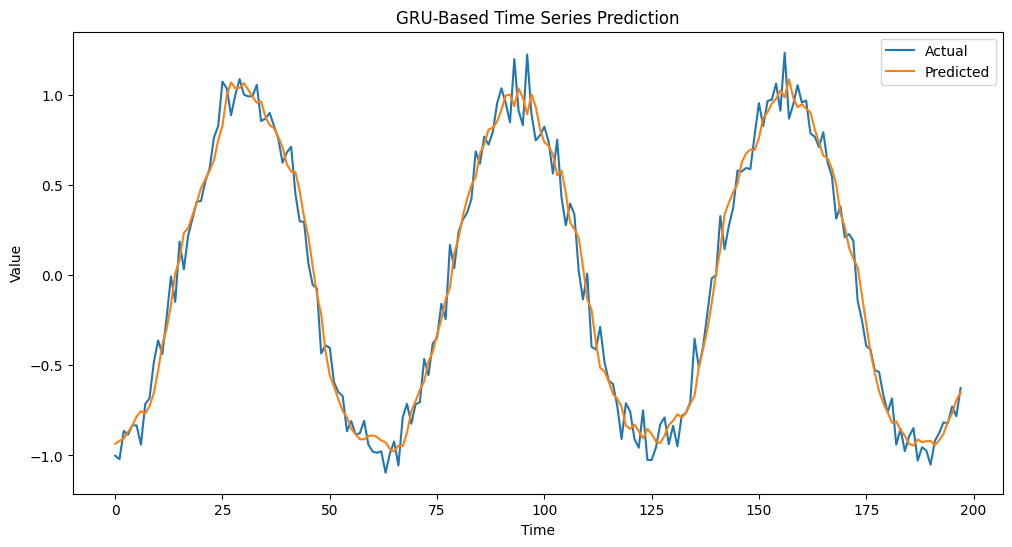

In [11]:
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("GRU-Based Time Series Prediction")
plt.show()